# Lab | Text Generation from Shakespeare's Sonnet

In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
from tensorflow.keras.regularizers import l2  # Importing regularizers for use in Dense layers
import tensorflow.keras.utils as ku 
import numpy as np 

In [4]:
tokenizer = Tokenizer()
#!wget --no-check-certificate \
#    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
#    -O /tmp/sonnets.txt

In [5]:
data = open('sonnets.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

# Example setup to use GPU if available
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)  # Adjust based on your GPU memory

# Create a Sequential model
model = Sequential()

# Add an Embedding layer
model.add(Embedding(input_dim=total_words, output_dim=100)

# Add a Bidirectional LSTM layer
model.add(LSTM(150, return_sequences=True))

# Add a Dropout layer
model.add(Dropout(0.2))

# Add another LSTM layer
model.add(LSTM(100))

# Add a Dense layer with regularization
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))

# Add the output Dense layer with softmax activation
model.add(Dense(total_words, activation='softmax'))

# Build the model to finalize its architecture
model.build((None, max_sequence_len))  # Specify input shape; None indicates variable batch size

# Compile the model
model.compile(
    loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Print the compiled model summary
print(model.summary())

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2024-06-14 00:44:40.440434: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-06-14 00:44:40.440478: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-06-14 00:44:40.440488: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-06-14 00:44:40.440522: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-14 00:44:40.440544: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 11, 100)        │       348,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 11, 150)        │       150,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 150)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100)            │       100,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3487)           │       226,655 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 832,819 (3.18 MB)

 Trainable params: 832,819 (3.18 MB)

 Non-trainable params: 0 (0.00 B)

None


In [6]:
history = model.fit(predictors, label, epochs=100, batch_size=128, verbose=2)

Epoch 1/100


2024-06-14 00:44:42.156616: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


242/242 - 15s - 60ms/step - accuracy: 0.0207 - loss: 7.1054
Epoch 2/100
242/242 - 10s - 43ms/step - accuracy: 0.0226 - loss: 6.6078
Epoch 3/100
242/242 - 10s - 43ms/step - accuracy: 0.0216 - loss: 6.5783
Epoch 4/100
242/242 - 10s - 42ms/step - accuracy: 0.0223 - loss: 6.5685
Epoch 5/100
242/242 - 10s - 42ms/step - accuracy: 0.0226 - loss: 6.4804
Epoch 6/100
242/242 - 10s - 43ms/step - accuracy: 0.0209 - loss: 6.3991
Epoch 7/100
242/242 - 10s - 42ms/step - accuracy: 0.0279 - loss: 6.3141
Epoch 8/100
242/242 - 10s - 41ms/step - accuracy: 0.0310 - loss: 6.2212
Epoch 9/100
242/242 - 11s - 45ms/step - accuracy: 0.0336 - loss: 6.1414
Epoch 10/100
242/242 - 10s - 40ms/step - accuracy: 0.0348 - loss: 6.0796
Epoch 11/100
242/242 - 10s - 42ms/step - accuracy: 0.0394 - loss: 6.0266
Epoch 12/100
242/242 - 10s - 43ms/step - accuracy: 0.0421 - loss: 5.9847
Epoch 13/100
242/242 - 10s - 41ms/step - accuracy: 0.0443 - loss: 5.9410
Epoch 14/100
242/242 - 11s - 46ms/step - accuracy: 0.0465 - loss: 5.9000

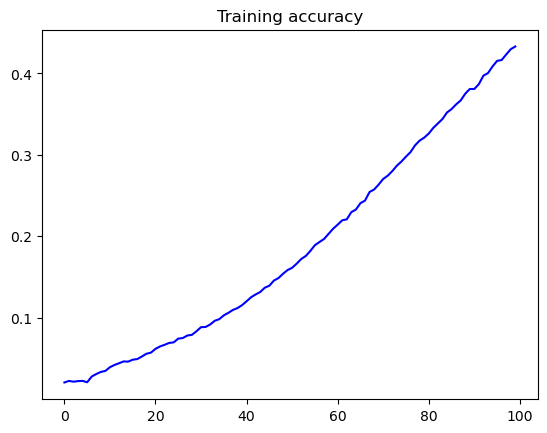

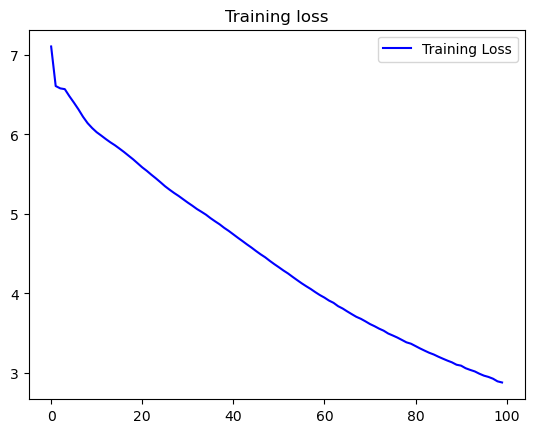

In [7]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [16]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
    # Convert seed text to sequence and pad
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')

    # Predict the next word
    predicted_probs = model.predict(token_list, verbose=0)  # Get probabilities for each class
    predicted_class = np.argmax(predicted_probs, axis=-1)   # Get the index of the highest probability

    # Find the word corresponding to the predicted class index
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted_class:
            output_word = word
            break

    # Append the predicted word to the seed text
    seed_text += " " + output_word

print(seed_text)

Help me Obi Wan Kenobi, you're my only hope of view prove grew hate vow loves loves will more go another ‘will ’ is yet all thine eye to day saith men stand so cover thee evil die feeding ride plea wrack place of were dead decay loving part doth youth false all to be still still feel this black eye in time truth in thee for his breast that yet in this loving love thou find look less fair all be than still show thee it die decay eye bright bright bright bring bright hate one decay go up slain forth room err’d sauces ‘hues’ to fair one
